<a href="https://colab.research.google.com/github/ML-Bioinfo-CEITEC/ECCB2022/blob/main/04_Gradio_app_and_HF_spaces.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install -qq timm gradio transformers datasets

     |████████████████████████████████| 365 kB 4.8 MB/s 
     |████████████████████████████████| 212 kB 68.0 MB/s 
     |████████████████████████████████| 115 kB 72.1 MB/s 
     |████████████████████████████████| 127 kB 59.9 MB/s 


## Gradio Pets

It is often useful to get others a possibility to use your model. HF enables to host simple web apps under [HF Spaces](https://huggingface.co/spaces/jph00/pets). For example, this is [jph00/pets](https://huggingface.co/spaces/jph00/pets) app created by Jeremy Howard. 

Can we replicate it with Colab?

## Model training

In [ ]:
from fastai.vision.all import *

     |████████████████████████████████| 509 kB 15.4 MB/s 


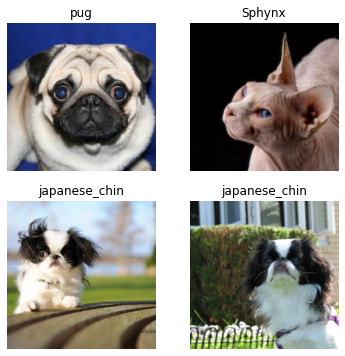

In [ ]:
# PETS dataset is a part of fastai library
path = untar_data(URLs.PETS)/'images'

dls = ImageDataLoaders.from_name_func('.',
    get_image_files(path), valid_pct=0.2, seed=42,
    label_func=RegexLabeller(pat = r'^([^/]+)_\d+'),
    item_tfms=Resize(224))

dls.show_batch(max_n=4)

In [ ]:
dls.vocab

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']

In [ ]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(3)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.498593,0.315939,0.102842,00:55


epoch,train_loss,valid_loss,error_rate,time
0,0.443713,0.323422,0.094046,00:50
1,0.266294,0.245276,0.075778,00:51
2,0.134413,0.226748,0.067659,00:47


In [ ]:
learn.export('model.pkl')

## Gradio app

In [ ]:
from fastai.vision.all import *
import gradio as gr

learn = load_learner('model.pkl')

To create Gradio app, two things need to be specified:


*   Input(s) and output types (interface)
*   A function that will process input into output 



In [ ]:
# all possible lables
categories = learn.dls.vocab

# function for the prediction
def classify_image(img):
    pred,idx,probs = learn.predict(img)
    return dict(zip(categories, map(float,probs)))

In [ ]:
!wget https://huggingface.co/spaces/jph00/pets/resolve/main/basset.jpg

examples = ['basset.jpg']

--2022-09-12 08:56:14--  https://huggingface.co/spaces/jph00/pets/resolve/main/basset.jpg
Resolving huggingface.co (huggingface.co)... 52.6.16.131, 52.202.207.64, 2600:1f18:147f:e800:afa4:a769:1b42:e343, ...
Connecting to huggingface.co (huggingface.co)|52.6.16.131|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs.huggingface.co/repos/aa/e3/aae372950067220ea6680a9eebefcbdf3e4046c45fabd8dfe4870b8de5e948a2/d4cb7457aedd287819ba4da40fd0adbac9447c09eb3b33416f9a1594c21126b1?response-content-disposition=attachment%3B%20filename%3D%22basset.jpg%22 [following]
--2022-09-12 08:56:15--  https://cdn-lfs.huggingface.co/repos/aa/e3/aae372950067220ea6680a9eebefcbdf3e4046c45fabd8dfe4870b8de5e948a2/d4cb7457aedd287819ba4da40fd0adbac9447c09eb3b33416f9a1594c21126b1?response-content-disposition=attachment%3B%20filename%3D%22basset.jpg%22
Resolving cdn-lfs.huggingface.co (cdn-lfs.huggingface.co)... 108.156.60.112, 108.156.60.109, 108.156.60.44, ...
Connecting to 

In [ ]:
image = gr.inputs.Image(shape=(192, 192))
label = gr.outputs.Label()

intf = gr.Interface(fn=classify_image, inputs=image, outputs=label, examples=examples)

/usr/local/lib/python3.7/dist-packages/gradio/inputs.py:257: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  "Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components",
/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.7/dist-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  "Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components",
/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
 

In [ ]:
intf.launch(debug=True)

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://22083.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces: https://huggingface.co/spaces


(<gradio.routes.App at 0x7f27d865e350>,
 'http://127.0.0.1:7860/',
 'https://22083.gradio.app')

For hosting an app on HF Spaces, you need first to get yourself HF account, create an app (description) and then just [upload the files](https://huggingface.co/spaces/jph00/pets/tree/main) into HF Space repo. See [HF course](https://huggingface.co/course/chapter9/1) for details.